   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.5600

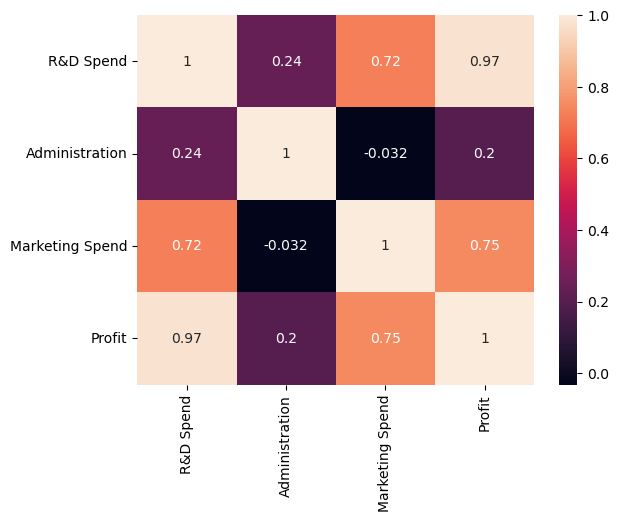

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


In [7]:
#Profit Prediction with Machine Learning
#https://thecleverprogrammer.com/2021/04/29/profit-prediction-with-machine-learning/
#https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#reading dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv')
print(dataset.head())
print(dataset.describe())
print(dataset.info())
print(dataset.isnull().sum())

correlation= dataset.corr()
#visualization
sns.heatmap(correlation, annot=True)
plt.show()

#selecting parts of our dataset
X = dataset[["R&D Spend", "Administration", "Marketing Spend"]]
y = dataset["Profit"]

#converting dataset
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model creation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions
ypred = model.predict(X_test)
dataset = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(dataset.head())